### Task 1. Text Cleaning.

<b>Text cleaning</b> involves removing unnecessary noise, transforming text into a consistent format, and handling any irregularities that may hinder meaningful analysis. Most of the time we have to define rules for text normalization ourselves, but there are also libraries such as <em>cleantext</em> which can do it instead of us.

In [20]:
from cleantext import clean 

In [46]:
text = """If you have time, don't forget to call me, my number is +0667899023. \
If it's better to email me - liiev@gmail.com. \
Could you borrow me $50????"""

In [50]:
cleaned = clean(text,
                no_punct=True,
                no_numbers=True,
                no_urls=True,
                no_emails=True,
                no_currency_symbols=True,
                replace_with_number="<number>",
                replace_with_email="<email>",
                replace_with_currency_symbol="<cur>",
                lang='en'
                )

print(cleaned)

if you have time dont forget to call me my number is <number> if its better to email me <email> could you borrow me <cur><number>


This library is fine, but it's designed only for two languages: English and German. However, the algorithm for cleaning the input text is general for all the languages and can include the following steps: <br>
1) Lowercasing the text 
2) Digits removal 
3) Special characters and punctuation removal 
4) Contractions replacement
5) Text tokenization 
6) Stopwords removal 
7) Lemmatization or Stemming <br>

We'll take a look at all of these steps later.


### Task 2. Language Detection.

In [3]:
from langdetect import detect 

In [7]:
sentences = [
    "The sun is shining brightly in the sky.",
    "El sol brilla intensamente en el cielo.",
    "Le soleil brille intensément dans le ciel.",
    "Die Sonne scheint hell am Himmel.",
    "Il sole brilla luminoso nel cielo.",
    "太陽が空に明るく輝いています。",
    "Солнце ярко светит на небе.",
    "الشمس تشرق بوضوح في السماء.",
    "सूरज आसमान में चमक रहा है।",
    "Сонце яскраво світить на небі."
]


In [5]:
for sent in sentences:
    print(detect(sent))

en
es
fr
de
it
ja
bg
ar
hi
uk


Only the Russian sentence was identified incorrectly by having been assigned the 'bg' (Bulgarian) tag.

In the following tasks we are going to use SpaCy for solving different NLP problems.

### Task 3. Convert a string containing human language text into lists of sentences and words.

<b>Word tokenization</b> refers to splitting the text into a list of words.

In [1]:
import spacy 

spacy.__version__

'3.7.2'

In [2]:
nlp = spacy.load("en_core_web_sm")

In [51]:
text = """The sun peeked through the clouds, casting a warm glow over the tranquil meadow. \
Birds chirped melodiously, creating a symphony that echoed through the trees. \
The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, \
creating a delightful aroma in the air. A gentle breeze danced through the leaves, \
causing them to rustle softly. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.""" 

In [52]:
doc = text
doc_nlp = nlp(doc)

print(type(doc))
print(type(doc_nlp))

<class 'str'>
<class 'spacy.tokens.doc.Doc'>


In [53]:
[token.text for token in doc_nlp]

['The',
 'sun',
 'peeked',
 'through',
 'the',
 'clouds',
 ',',
 'casting',
 'a',
 'warm',
 'glow',
 'over',
 'the',
 'tranquil',
 'meadow',
 '.',
 'Birds',
 'chirped',
 'melodiously',
 ',',
 'creating',
 'a',
 'symphony',
 'that',
 'echoed',
 'through',
 'the',
 'trees',
 '.',
 'The',
 'scent',
 'of',
 'freshly',
 'cut',
 'grass',
 'mingled',
 'with',
 'the',
 'sweet',
 'fragrance',
 'of',
 'blooming',
 'flowers',
 ',',
 'creating',
 'a',
 'delightful',
 'aroma',
 'in',
 'the',
 'air',
 '.',
 'A',
 'gentle',
 'breeze',
 'danced',
 'through',
 'the',
 'leaves',
 ',',
 'causing',
 'them',
 'to',
 'rustle',
 'softly',
 '.',
 'In',
 'that',
 'serene',
 'moment',
 ',',
 'everything',
 'felt',
 'harmonious',
 'and',
 'alive',
 ',',
 'embracing',
 'the',
 'beauty',
 'of',
 'nature',
 '.']

<b>Sentence tokenization</b> refers to splitting the text into a list of sentences.

In [54]:
text = """The sun peeked through the clouds, casting a warm glow over the tranquil meadow. \
Birds chirped melodiously, creating a symphony that echoed through the trees. \
The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, \
creating a delightful aroma in the air. A gentle breeze danced through the leaves, \
causing them to rustle softly. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.""" 

text

'The sun peeked through the clouds, casting a warm glow over the tranquil meadow. Birds chirped melodiously, creating a symphony that echoed through the trees. The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, creating a delightful aroma in the air. A gentle breeze danced through the leaves, causing them to rustle softly. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.'

In [55]:
text_nlp = nlp(text)
sentences = list(text_nlp.sents)

# number of sentences in our string
len(sentences)

5

In [56]:
for idx, sent in enumerate(sentences):
    print(f"{idx+1}." ,sent)

1. The sun peeked through the clouds, casting a warm glow over the tranquil meadow.
2. Birds chirped melodiously, creating a symphony that echoed through the trees.
3. The scent of freshly cut grass mingled with the sweet fragrance of blooming flowers, creating a delightful aroma in the air.
4. A gentle breeze danced through the leaves, causing them to rustle softly.
5. In that serene moment, everything felt harmonious and alive, embracing the beauty of nature.


In [61]:
# index positioning 

data = []

for token in text_nlp:
    to_add = (token, token.idx, token.is_alpha, token.is_stop)
    data.append(to_add) 


In [62]:
# list of tuples
# 1st item in a tuple is each token in the text, 2d - starting index of this token
# 3d - if a token is alphabetical (word), 4th - if a token is a stop word
data

[(The, 0, True, True),
 (sun, 4, True, False),
 (peeked, 8, True, False),
 (through, 15, True, True),
 (the, 23, True, True),
 (clouds, 27, True, False),
 (,, 33, False, False),
 (casting, 35, True, False),
 (a, 43, True, True),
 (warm, 45, True, False),
 (glow, 50, True, False),
 (over, 55, True, True),
 (the, 60, True, True),
 (tranquil, 64, True, False),
 (meadow, 73, True, False),
 (., 79, False, False),
 (Birds, 81, True, False),
 (chirped, 87, True, False),
 (melodiously, 95, True, False),
 (,, 106, False, False),
 (creating, 108, True, False),
 (a, 117, True, True),
 (symphony, 119, True, False),
 (that, 128, True, True),
 (echoed, 133, True, False),
 (through, 140, True, True),
 (the, 148, True, True),
 (trees, 152, True, False),
 (., 157, False, False),
 (The, 159, True, True),
 (scent, 163, True, False),
 (of, 169, True, True),
 (freshly, 172, True, False),
 (cut, 180, True, False),
 (grass, 184, True, False),
 (mingled, 190, True, False),
 (with, 198, True, True),
 (the, 203

In [63]:
import pandas as pd 

columns = ['token', 'start_index', 'is_alpha', 'is_stop_word']
df = pd.DataFrame(data, columns=columns)

In [64]:
df

,token,start_index,is_alpha,is_stop_word
0,The,0,True,True
1,sun,4,True,False
2,peeked,8,True,False
3,through,15,True,True
4,the,23,True,True
...,...,...,...,...
78,the,429,True,True
79,beauty,433,True,False
80,of,440,True,True
81,nature,443,True,False


Stop words 

<b>Stop word</b> is a commonly used word (such as <em>the, a, it, in</em> etc. in English) which don't really add semantic meaning to the text and can be simply removed.

In [65]:
import spacy

In [66]:
from spacy.lang.fr import stop_words as french_stop_words

french_stop_words = french_stop_words.STOP_WORDS

# number of French stop words in spacy
len(french_stop_words)

507

In [67]:
from spacy.lang.de import stop_words as german_stop_words

german_stop_words = german_stop_words.STOP_WORDS

# number of German stop words
len(german_stop_words)

543

In [69]:
# first 15 German stopwords
for word in list(german_stop_words)[:15]:
    print(word)

zwanzig
ihm
ist
er
großer
seiner
bin
wo
bis
durften
seinem
recht
das
nicht
gedurft


In [92]:
de_nlp = spacy.load("de_core_news_sm")

In [112]:
def remove_stop_words(text):

    doc = de_nlp(text)

    no_stopwords_sent = [str(word) for word in doc if not word.is_stop]

    return ' '.join(no_stopwords_sent)

remove_stop_words("Ich möchte gerne noch ein Bier bestellen.")

'gerne Bier bestellen .'

### Task 4. Generate base forms of those words.

<b>Lemmatization</b> is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language. This reduced form, or root word, is called a lemma.
For example, words <em>was, were, been, being</em> are all forms of the lemma <em>be</em>. While the lemma table has the following paradigm in the English language: table, tables, table's and tables'.
English is not highly inflected language, unlike, for instance, Slavic languages. Ukrainian noun paradigm includes 14 words forms, adjective and verb paradigms - 24 each. 

In [114]:
text_nlp[:10]

The sun peeked through the clouds, casting a warm

In [113]:
for token in text_nlp[:10]:
    if str(token).lower() != str(token.lemma_):
        # print only if the word form is different from lemma
        print(f"{str(token):>20} : {str(token.lemma_)}")

              peeked : peek
              clouds : cloud
             casting : cast


### Task 5. Detect parts of speech and morphological features.

In [116]:
morph_info = []

for token in text_nlp:
    tup = (str(token), str(token.lemma_), str(token.tag_), token.pos_, spacy.explain(token.tag_), token.morph.to_dict())
    morph_info.append(tup)
    

<b>.tag_</b> displays a fine-grained tag (more specific, carrying more morphological information) <br>
<b>.pos_</b> displays a coarse-grained tag which is the reduced version of the fine-grained tag (carries less detailed information about the token morphological features)

In [117]:
columns = ['token', 'lemma', 'tag', 'pos', 'tag_explanation', 'morph_features']
df = pd.DataFrame(morph_info, columns=columns)
df.loc[df.morph_features == {}, 'morph_features'] = '-'

df

,token,lemma,tag,pos,tag_explanation,morph_features
0,The,the,DT,DET,determiner,"{'Definite': 'Def', 'PronType': 'Art'}"
1,sun,sun,NN,NOUN,"noun, singular or mass",{'Number': 'Sing'}
2,peeked,peek,VBD,VERB,"verb, past tense","{'Tense': 'Past', 'VerbForm': 'Fin'}"
3,through,through,IN,ADP,"conjunction, subordinating or preposition",-
4,the,the,DT,DET,determiner,"{'Definite': 'Def', 'PronType': 'Art'}"
...,...,...,...,...,...,...
78,the,the,DT,DET,determiner,"{'Definite': 'Def', 'PronType': 'Art'}"
79,beauty,beauty,NN,NOUN,"noun, singular or mass",{'Number': 'Sing'}
80,of,of,IN,ADP,"conjunction, subordinating or preposition",-
81,nature,nature,NN,NOUN,"noun, singular or mass",{'Number': 'Sing'}


### Task 6. Dependency parsing.

<b>Dependency parsing</b> is the process of extracting the dependency graph of a sentence to represent its grammatical structure. It defines the dependency relationship between headwords and their dependents. The head of a sentence has no dependency and is called the root of the sentence. The verb is usually the root of the sentence. All other words are linked to the headword.

In [118]:
print(sentences[0])
print(type(sentences[0]))

The sun peeked through the clouds, casting a warm glow over the tranquil meadow.
<class 'spacy.tokens.span.Span'>


In [119]:
dependencies = []

for token in sentences[0]:
    dep_tuple = (token, token.tag_, token.head.text, token.dep_)
    dependencies.append(dep_tuple)

In [120]:
dependencies

[(The, 'DT', 'sun', 'det'),
 (sun, 'NN', 'peeked', 'nsubj'),
 (peeked, 'VBD', 'peeked', 'ROOT'),
 (through, 'IN', 'peeked', 'prep'),
 (the, 'DT', 'clouds', 'det'),
 (clouds, 'NNS', 'through', 'pobj'),
 (,, ',', 'peeked', 'punct'),
 (casting, 'VBG', 'peeked', 'advcl'),
 (a, 'DT', 'glow', 'det'),
 (warm, 'JJ', 'glow', 'amod'),
 (glow, 'NN', 'casting', 'dobj'),
 (over, 'IN', 'glow', 'prep'),
 (the, 'DT', 'meadow', 'det'),
 (tranquil, 'NN', 'meadow', 'compound'),
 (meadow, 'NN', 'over', 'pobj'),
 (., '.', 'peeked', 'punct')]

In [121]:
columns = ['token', 'tag', 'headword', 'dep']
df = pd.DataFrame(dependencies, columns=columns)

df

,token,tag,headword,dep
0,The,DT,sun,det
1,sun,NN,peeked,nsubj
2,peeked,VBD,peeked,ROOT
3,through,IN,peeked,prep
4,the,DT,clouds,det
5,clouds,NNS,through,pobj
6,",",",",peeked,punct
7,casting,VBG,peeked,advcl
8,a,DT,glow,det
9,warm,JJ,glow,amod


In [122]:
# visualize a dependency tree using displacy
from spacy import displacy

displacy.serve(sentences[0], style='dep')

C:\Users\Фед\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [124]:
# element 1 is the token, element 2 - fine-grained tag, element 3 - explanation of the tag
for dep in dependencies:
    print(f'{dep[0]} - {dep[-1]} - {spacy.explain(dep[-1])}')

The - det - determiner
sun - nsubj - nominal subject
peeked - ROOT - root
through - prep - prepositional modifier
the - det - determiner
clouds - pobj - object of preposition
, - punct - punctuation
casting - advcl - adverbial clause modifier
a - det - determiner
warm - amod - adjectival modifier
glow - dobj - direct object
over - prep - prepositional modifier
the - det - determiner
tranquil - compound - compound
meadow - pobj - object of preposition
. - punct - punctuation


Examples of dependencies in this sentence:

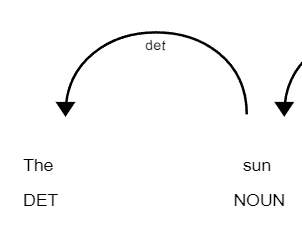

Determiner (det) <em>the</em> is dependent on the noun <em>Sun</em>. Together they form a noun phrase.

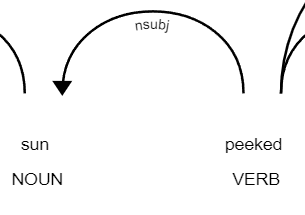

The verb <em>peeked</em> is the predicate of the sentence and its root, that's why the nominal subject (nsubj) <em>sun</em> is dependant on the verb <em>peeked.

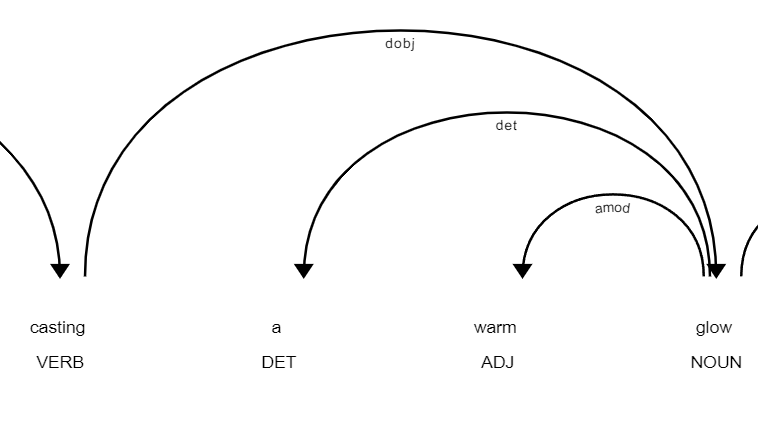



The verb <em>casting</em> starts an adverbial clause modifier (advcl), with <em>glow</em> being a direct object (dobj) of <em>casting</em>. The words <em>a</em> (determiner) and <em>warm</em> (adjective) modify the noun <em>glow</em> and are dependent on it.

### Task 7. Provide syntactic structure of the sentence.

<b>Syntax</b> in linguistics refers to the arrangement of words and phrases in a sentence.

<em>English sentence depedencies:

In [125]:
text = "I love you so much"
doc = nlp(text)
for i in doc:
    print(i.dep_)
    

nsubj
ROOT
dobj
advmod
advmod


<em>Ukrainian language depedencies</em>. As you can see, the model works properly, having correctly identified all the sentence parts

In [126]:
uk_nlp = spacy.load("uk_core_news_sm")

text = "Я тебе так сильно люблю"
doc = uk_nlp(text)
for i in doc:
    print(i.dep_)

nsubj
obj
advmod
advmod
ROOT


Syntactic typology distinguishes languages based on their preferred word order. The most commonly considered phrases considered are the subject, object, and verb. This gives six different possible orderings: SOV, SVO, VSO, OSV, OVS, VOS. 

Subject-object-verb (SOV) order is the most common one (45% of languages), then comes SVO order (42%), VSO (9%), VOS (3%), OVS (1%) and OSV (~0%)

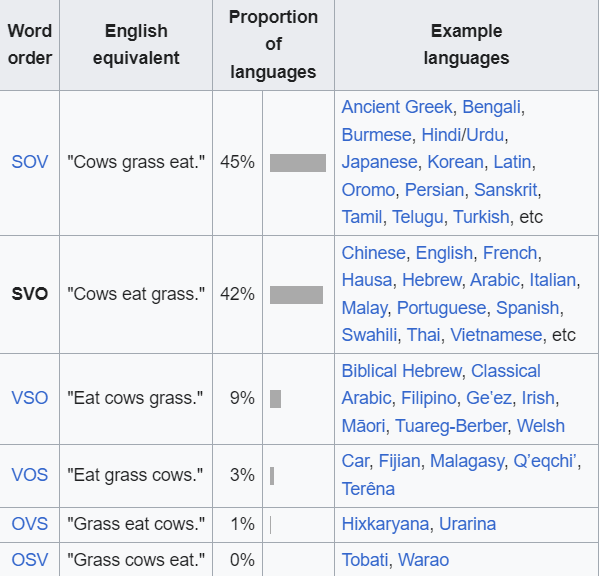

Now we can use this knowledge to identify the syntactic structure of the sentence.

In [127]:
dep_dict = {
    'nsubj':'S',
    'ROOT':'V',
    'obj':'O',
    'dobj':'O'
}

def detect_synt_pattern(text):
    sent_structure = ""

    for i in text:
        if i.dep_ in dep_dict:
            sent_structure += str(dep_dict[i.dep_])
    
    return sent_structure

# doc - "Я тебе так сильно люблю"
print(detect_synt_pattern(doc))


SOV


It's worth mentioning that Ukrainian language just like all the other Slavic languages has a free word order, so it can be SOV (я тебе люблю), SVO (я люблю тебе), VOS (люблю тебе я), VSO (люблю я тебе), OVS (тебе люблю я) OSV (тебе я люблю), however, the first two options are the most common and conventional. Also, various word orders may imply different contextual meaning each time.

In [128]:
# chinese language model
zh_nlp = spacy.load('zh_core_web_sm')

zh_text = "我是如此爱你"

zh_doc = zh_nlp(zh_text)

print(detect_synt_pattern(zh_doc))

SVO


In [129]:
# greek language model 

el_nlp = spacy.load('el_core_news_sm')

el_texts = [
     "Ο σκύλος της δάγκωσε τη μητέρα μου.",
     "Τα πουκάμισά της είναι τόσο βρώμικα.",
     "Το πρωινό μου ήταν αηδιαστικό.",
     "Ο πατέρας μου με άφησε επιτέλους να πάω στη ντίσκο."
]

for text in el_texts:
    el_doc = el_nlp(text)
    print(detect_synt_pattern(el_doc))

SVO
SV
SV
VOV


The syntactic structures of the first three sentences are identified correctly. However, in the last sentence, the subject of the sentence πατέρας (father) was identified incorrectly as ROOT (predicate):

In [171]:
for i in el_nlp(el_texts[-1]):
    print(i, i.dep_)

Ο det
πατέρας ROOT
μου nmod
με obj
άφησε ROOT
επιτέλους advmod
να aux
πάω punct
στη case
ντίσκο ccomp
. punct


### Task 8. Recognize named entities.

<b>Named-entity recognition (NER)</b> (also known as (named) entity identification, entity chunking, and entity extraction) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

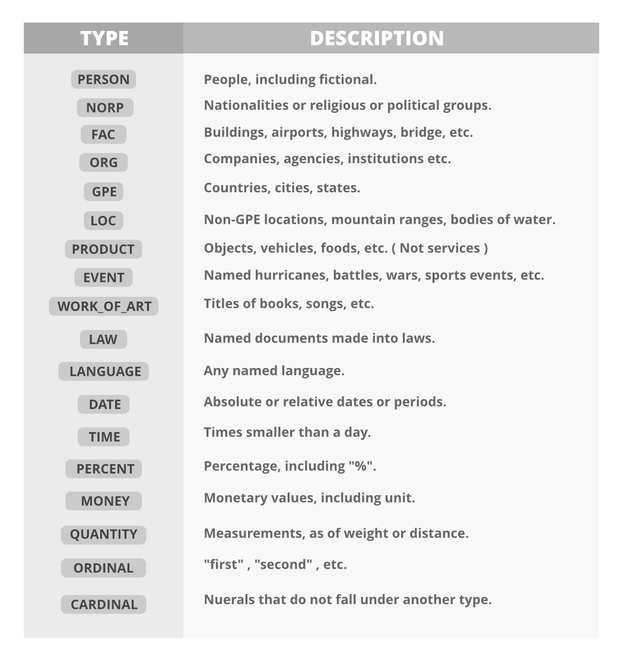

List of available NER tags in spacy

In [130]:
de_text = "Bismarck führte Kriege gegen Dänemark (1864), Österreich (1866) und Frankreich (1871), um Preußens Macht zu stärken. Der Deutsch-Französische Krieg war auf lange Sicht von großer Bedeutung. Frankreich verlor Elsass-Lothringen während des deutschen Sieges, der von dem brillanten Helmuth von Moltke angeführt wurde. Der Krieg machte Deutschland auch zum wichtigsten Land in Mitteleuropa."

In [131]:
de_nlp = spacy.load("de_core_news_sm")
de_doc = de_nlp(de_text)
displacy.serve(de_doc, style="ent")


C:\Users\Фед\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In the example above (NER for German), the model works quite poorly, failing to recognize multiple dates (DATE) in the text. <em>Mitteleuropa</em> is a region and should have been assigned a LOC tag. While country names such as <em>Dänemark, Österreich, Frankreich and Deutschland</em> were recognised, but incorrectly: there's a special tag GPE for countries, states and cities. 

In [133]:
text = "Bismarck conducted wars against Denmark (1864), Austria (1866) and France (1871) to make Prussia more powerful. The Franco-Prussian War was very significant in the long run. France lost Alsace–Lorraine during the German victory, which was led by the brilliant Helmuth von Moltke. The war also made Germany the most important country in Central Europe."
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.serve(doc, style="ent")

C:\Users\Фед\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


English NER model works much better than the German one. It only failed to recognize <em>Bismarck</em> as a person (PER) and recognized <em>Lorraine</em> as a separate word despite it being a part of the "Alsace-Lorraine" compound word (LOC).

In [134]:
text = "Бісмарк провів війни проти Данії (1864), Австрії (1866) та Франції (1871), щоб зробити Пруссію більш потужною. Франко-прусська війна була дуже важливою в довгостроковій перспективі. Франція втратила Ельзас-Лотарингію під час перемоги Німеччини, яку очолював блискучий Гельмут фон Мольтке. Війна також зробила Німеччину найважливішою країною в Центральній Європі."
uk_doc = uk_nlp(text)
displacy.serve(uk_doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Ukrainian NER model showed modest performance. It struggled to distinguish different geographical entities (LOC, GPE), didn't detect dates, persons (Бісмарк), and events (Франко-прусська війна).